# **Random Forest Classifier Model**

## **Initializing the Model**
`Run the cell below to initialize model and access evaluations.`

In [ ]:
# setup
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# find base directory and data files
base_dir = Path.cwd()
training_data_path = base_dir.parent / 'data' / 'training_cleaned.csv'
test_data_path = base_dir.parent / 'data' / 'test_cleaned.csv'

# load data
df_training = pd.read_csv(training_data_path)
df_test = pd.read_csv(test_data_path)

# assign training features and target
X_training = df_training.drop(columns = ['class'])
y_training = df_training['class']

# assign testing features and target
X_test = df_test.drop(columns=['class'])
y_test = df_test['class']

# intialize model
model = RandomForestClassifier(n_estimators=100, random_state=17)

## **Training and Saving the Model**
> ⚠️ **Warning**: The cell below will train and save a Random Forest Classifier model to `saved_models/random_forest_model.pkl`.
>
> By default, it won't run if the model's file already exists.  
> Set `overwrite = True` in the code block to force regeneration.

In [ ]:
# setup
import joblib

# designate base directory and output path
base_dir = Path.cwd()
output_path = base_dir.parent / 'models_saved' / 'random_forest_model.pkl'

# optional: overwrite existing model file
overwrite = False  # set to True if you want to reprocess and overwrite

# check for file existence; train model if necessary/desired
if not output_path.exists() or overwrite: 
    print("Training and saving the model...")

    # train the model
    model.fit(X_training, y_training)

    # save the model
    joblib.dump(model, output_path)

    print(f"Model trained and saved to: {output_path}")
else:
    print(f"Saved model already exists at: {output_path}")
    print("Set `overwrite = True` to re-train it.")



Saved model already exists at: c:\Users\mwals\OneDrive\Documents\VScode\Python\Data Analysis Projects\APS-Failure-Classification-Model\models_saved\random_forest_model.pkl
Set `overwrite = True` to re-train it.


## **Evaluating the Model**

Accuracy: 0.9919375

Classification Report: 

              precision    recall  f1-score   support

         neg       0.99      1.00      1.00     15625
         pos       0.94      0.70      0.80       375

    accuracy                           0.99     16000
   macro avg       0.96      0.85      0.90     16000
weighted avg       0.99      0.99      0.99     16000




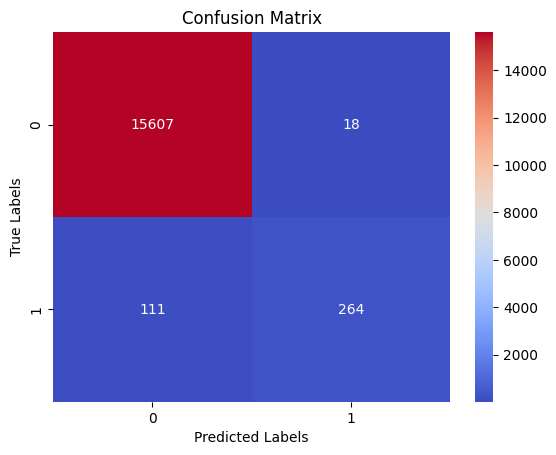

In [ ]:
# setup
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# designate base directory and model path
base_dir = Path.cwd()
model_path = base_dir.parent / 'models_saved' / 'random_forest_model.pkl'

# load model
model = joblib.load(model_path)

# make predictions
y_prediction = model.predict(X_test)

#-----evaluate model-----#
# accuracy score
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}\n")

# classification report
report = classification_report(y_test, y_prediction)
print(f"Classification Report: \n\n{report}\n")

# confusion matrix
cm = confusion_matrix(y_test, y_prediction)

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()